In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv('../data/raw/abc_xyz_dataset.csv')
df.head()


,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,Aug_Demand,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value
0,ITM_001,Surface Near,Grocery,4516,4069,4664,4653,4508,4125,4669,4210,4824,4497,4259,4782,53776,10,537760
1,ITM_002,Central Him,Grocery,4792,4964,4628,4660,4897,5015,4805,4686,4896,4536,4520,5054,57453,100,5745300
2,ITM_003,Win Everyone,Apparel,61,175,38,43,15,161,224,41,387,340,70,21,1576,2,3152
3,ITM_004,Task Save,Apparel,1145,1113,717,832,783,954,1047,894,994,978,1136,712,11305,2,22610
4,ITM_005,Hotel Teacher,Grocery,1494,2051,1400,1918,1669,1733,1695,1560,1679,1381,1591,1662,19833,10,198330


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Item_ID             1000 non-null   object
 1   Item_Name           1000 non-null   object
 2   Category            1000 non-null   object
 3   Jan_Demand          1000 non-null   int64 
 4   Feb_Demand          1000 non-null   int64 
 5   Mar_Demand          1000 non-null   int64 
 6   Apr_Demand          1000 non-null   int64 
 7   May_Demand          1000 non-null   int64 
 8   Jun_Demand          1000 non-null   int64 
 9   Jul_Demand          1000 non-null   int64 
 10  Aug_Demand          1000 non-null   int64 
 11  Sep_Demand          1000 non-null   int64 
 12  Oct_Demand          1000 non-null   int64 
 13  Nov_Demand          1000 non-null   int64 
 14  Dec_Demand          1000 non-null   int64 
 15  Total_Annual_Units  1000 non-null   int64 
 16  Price_Per_Unit      1000 

In [4]:
df.isnull().sum()
df.columns

Index(['Item_ID', 'Item_Name', 'Category', 'Jan_Demand', 'Feb_Demand',
       'Mar_Demand', 'Apr_Demand', 'May_Demand', 'Jun_Demand', 'Jul_Demand',
       'Aug_Demand', 'Sep_Demand', 'Oct_Demand', 'Nov_Demand', 'Dec_Demand',
       'Total_Annual_Units', 'Price_Per_Unit', 'Total_Sales_Value'],
      dtype='object')

In [5]:
df.sort_values('Total_Sales_Value', ascending=False)
df['Cumulative_Sales'] = df['Total_Sales_Value'].cumsum()
df['Cumulative_Sales_Percentage'] = 100 * df['Cumulative_Sales']/df['Total_Sales_Value'].sum()
df.columns

Index(['Item_ID', 'Item_Name', 'Category', 'Jan_Demand', 'Feb_Demand',
       'Mar_Demand', 'Apr_Demand', 'May_Demand', 'Jun_Demand', 'Jul_Demand',
       'Aug_Demand', 'Sep_Demand', 'Oct_Demand', 'Nov_Demand', 'Dec_Demand',
       'Total_Annual_Units', 'Price_Per_Unit', 'Total_Sales_Value',
       'Cumulative_Sales', 'Cumulative_Sales_Percentage'],
      dtype='object')

In [6]:
def classify_abc(percentage) :
    if percentage <= 80:
        return 'A'
    elif percentage <=95:
        return 'B'
    else:
        return 'C'
    
df['ABC_Class'] = df['Cumulative_Sales_Percentage']

In [7]:
df.columns

Index(['Item_ID', 'Item_Name', 'Category', 'Jan_Demand', 'Feb_Demand',
       'Mar_Demand', 'Apr_Demand', 'May_Demand', 'Jun_Demand', 'Jul_Demand',
       'Aug_Demand', 'Sep_Demand', 'Oct_Demand', 'Nov_Demand', 'Dec_Demand',
       'Total_Annual_Units', 'Price_Per_Unit', 'Total_Sales_Value',
       'Cumulative_Sales', 'Cumulative_Sales_Percentage', 'ABC_Class'],
      dtype='object')

In [8]:
columns_to_drop = ['Cumulative_Persentage', 'Cumulative_Percentage']
df = df.drop(columns=columns_to_drop, axis=1)

KeyError: "['Cumulative_Persentage', 'Cumulative_Percentage'] not found in axis"

In [ ]:
demand_columns = ['Jan_Demand', 'Feb_Demand',
       'Mar_Demand', 'Apr_Demand', 'May_Demand', 'Jun_Demand', 'Jul_Demand',
       'Aug_Demand', 'Sep_Demand', 'Oct_Demand', 'Nov_Demand', 'Dec_Demand']

df['Mean_Demand'] = df[demand_columns].mean(axis=1)
df['Std_Dev_Demand'] = df[demand_columns].std(axis=1)

In [ ]:
df['CV'] = df['Std_Dev_Demand']/df['Mean_Demand']

In [ ]:
def classify_xyz(cv):
    if cv <= 0.5:
        return 'X'
    elif cv <= 1.0:
        return 'Y'
    else:
        return 'Z'
    
df['XYZ_Class'] = df['CV'].apply(classify_xyz)
    

In [ ]:
df['ABC_Class'] = df['ABC_Class'].astype(str)
df['XYZ_Class'] = df['XYZ_Class'].astype(str)

In [ ]:
df['ABC_XYZ_Class'] = df['ABC_Class'] + df['XYZ_Class']

In [ ]:
print(df[['ABC_Class', 'XYZ_Class']].isnull().sum())

ABC_Class    0
XYZ_Class    0
dtype: int64


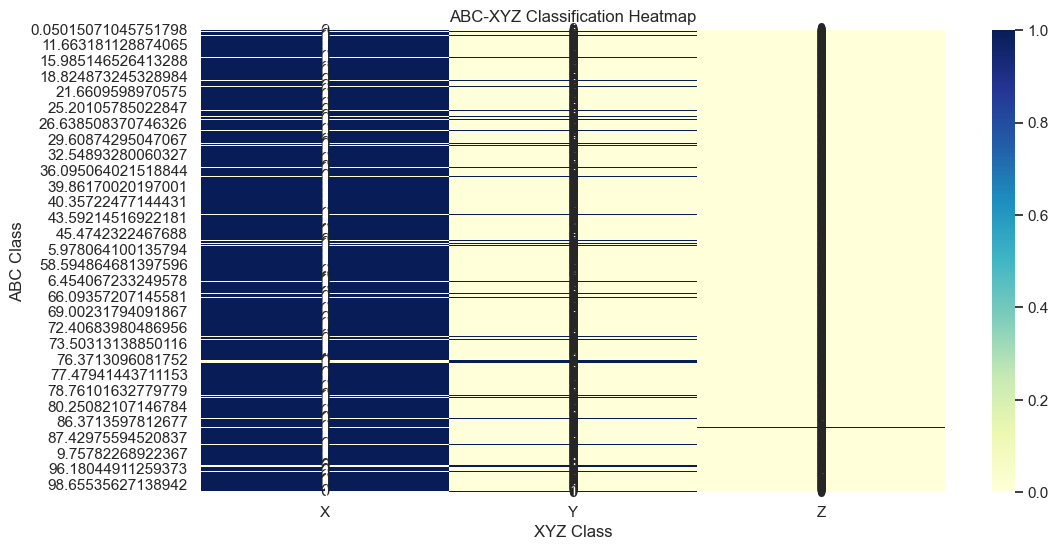

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table for heatmap
pivot_table = df.pivot_table(index='ABC_Class', columns='XYZ_Class', values='Item_ID', aggfunc='count', fill_value=0)

# Plot heatmap
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('ABC-XYZ Classification Heatmap')
plt.ylabel('ABC Class')
plt.xlabel('XYZ Class')
plt.show()


In [ ]:
print(df['ABC_Class'].unique())

['0.05015071045751798' '0.585948978814365' '0.5862429297206468'
 '0.5883515052254157' '0.6068474707212494' '0.6115775436802001'
 '0.613100269060203' '0.6137610990481195' '0.629032184360189'
 '0.6292214991887907' '2.5081478584249624' '2.515901373129362'
 '2.532916393069436' '2.533851403153948' '2.588053264426466'
 '2.5942025457901745' '2.5960182894910964' '2.5988104500666287'
 '3.0248527471027136' '3.0265500524625897' '3.03370111702277'
 '3.308953686785051' '3.312696151845041' '3.3141276703765845'
 '3.3276454952070242' '3.332165736459397' '3.648638579247234'
 '3.778934743178581' '3.783822423063806' '3.792345320692325'
 '3.8053147853295743' '3.8075255721900807' '4.131337861781337'
 '4.13302901207782' '4.245144424365882' '4.255693456953119'
 '4.377694274084413' '4.387918207414259' '4.39831616117276'
 '4.402232460144332' '4.613052707206712' '4.620026580548004'
 '4.6205930328972284' '4.664501016937709' '4.803502865228639'
 '4.841936573190838' '4.933106118235597' '4.934247602719382'
 '4.9863

# The FIX

# ABC CLASS

In [15]:
df = df.sort_values(by='Total_Sales_Value', ascending=False)
df['Cumulative_Sales'] = df['Total_Sales_Value'].cumsum()
df['Cumulative_Sales_Percentage'] = 100 * df['Cumulative_Sales'] / df['Total_Sales_Value'].sum()

def classify_abc(pct):
    if pct <= 80:
        return 'A'
    elif pct <= 95:
        return 'B'
    else:
        return 'C'

df['ABC_Class'] = df['Cumulative_Sales_Percentage'].apply(classify_abc)


In [16]:
print(df['ABC_Class'].value_counts())

ABC_Class
C    743
B    170
A     87
Name: count, dtype: int64


In [18]:
def classify_xyz(cv):
    if cv <= 0.5:
        return 'X'
    elif cv <= 1.0:
        return 'Y'
    else:
        return 'Z'

df['Mean_Demand'] = df[demand_columns].mean(axis=1)
df['Std_Dev_Demand'] = df[demand_columns].std(axis=1)
df['CV'] = df['Std_Dev_Demand'] / df['Mean_Demand']
df['XYZ_Class'] = df['CV'].apply(classify_xyz)

print(df['XYZ_Class'].value_counts())


NameError: name 'demand_columns' is not defined

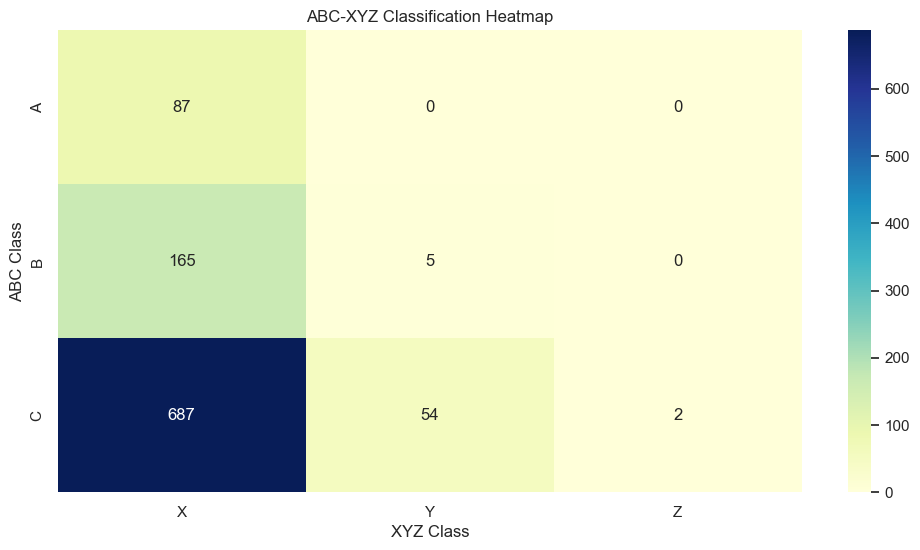

In [19]:
pivot_table = df.pivot_table(index='ABC_Class', columns='XYZ_Class', values='Item_ID', aggfunc='count', fill_value=0)
pivot_table = pivot_table.reindex(index=['A', 'B', 'C'], columns=['X', 'Y', 'Z'])

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('ABC-XYZ Classification Heatmap')
plt.ylabel('ABC Class')
plt.xlabel('XYZ Class')
plt.show()


# Feature Engineering

# XYZ CLASS

In [22]:
import numpy as np

months = ['Jan_Demand', 'Feb_Demand', 'Mar_Demand', 'Apr_Demand', 'May_Demand',
          'Jun_Demand', 'Jul_Demand', 'Aug_Demand', 'Sep_Demand',
          'Oct_Demand', 'Nov_Demand', 'Dec_Demand']

df["Demand_Mean"] = df[months].mean(axis=1)
df["Demand_Std"] = df[months].std(axis=1)
df["Demand_CV"] = df["Demand_Std"] / df["Demand_Mean"]

def classify_xyz(cv):
    if cv <= 0.5:
        return "X"
    elif cv <= 1.0:
        return "Y"
    else:
        return "Z"

df["XYZ_Class"] = df["Demand_CV"].apply(classify_xyz)

df.to_csv("../data/processed/engineered_inventory.csv", index=False)

print("YZ_Class added and file updated.")


YZ_Class added and file updated.


In [21]:
df.head()

,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,...,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value,Cumulative_Sales,Cumulative_Sales_Percentage,ABC_Class,Demand_Mean,Demand_Std,Demand_CV,XYZ_Class
924,ITM_925,Ten And,Grocery,4991,4663,5068,4885,5127,4705,5130,...,59462,1000,59462000,59462000,5.545339,A,4955.166667,175.138300,0.035345,X
511,ITM_512,Radio Race,Grocery,4185,4087,3660,3774,4391,3906,3699,...,47606,1000,47606000,107068000,9.985005,A,3967.166667,242.380930,0.061097,X
521,ITM_522,Pattern Book,Grocery,3079,3185,3081,2794,3313,3329,3168,...,37136,1000,37136000,144204000,13.448254,A,3094.666667,199.492234,0.064463,X
394,ITM_395,Animal Key,Grocery,5180,4626,5010,4802,4856,5361,5504,...,59609,500,29804500,174008500,16.227778,A,4967.416667,265.766972,0.053502,X
168,ITM_169,Material Vote,Grocery,4871,4994,4740,4958,4428,4889,4754,...,56862,500,28431000,202439500,18.879211,A,4738.500000,203.303848,0.042905,X
